# Caso Práctico: Clasificación de imágenes

## 1. Conjunto de datos

In [2]:
from tensorflow.keras import datasets

In [3]:
fashion_mnist = datasets.fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## 2. Visualización del conjunto de datos

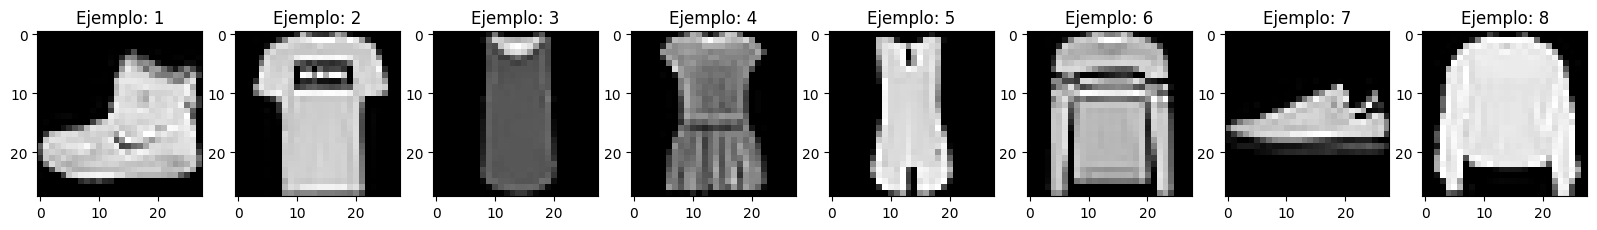

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, img in zip(range(1, 9), X_train[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

In [6]:
print("Longitud subconjunto de entrenamiento: ", len(X_train))
print("Longitud subconjunto de pruebas: ", len(X_test))

Longitud subconjunto de entrenamiento:  60000
Longitud subconjunto de pruebas:  10000


## 3. Transformación del conjunto de datos

In [7]:
X_train_prep = X_train.reshape((60000, 28*28))
X_test_prep = X_test.reshape((10000, 28*28))

In [8]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer()
X_train_prep = transformer.fit_transform(X_train_prep)
X_test_prep = transformer.transform(X_test_prep)

In [9]:
from tensorflow.keras.utils import to_categorical

y_train_prep = to_categorical(y_train)
y_test_prep = to_categorical(y_test)

## 4. Construcción del modelo

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

c:\Users\leone\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
network.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy', 'Precision'])

In [12]:
history = network.fit(X_train_prep, 
                      y_train_prep,
                      batch_size=32,
                      epochs=15, 
                      validation_data=(X_test_prep, y_test_prep))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - Precision: 0.8676 - accuracy: 0.8128 - loss: 0.5149 - val_Precision: 0.8779 - val_accuracy: 0.8463 - val_loss: 0.4253
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - Precision: 0.8917 - accuracy: 0.8648 - loss: 0.3667 - val_Precision: 0.8900 - val_accuracy: 0.8624 - val_loss: 0.3777
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - Precision: 0.9027 - accuracy: 0.8785 - loss: 0.3276 - val_Precision: 0.8904 - val_accuracy: 0.8702 - val_loss: 0.3653
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - Precision: 0.9073 - accuracy: 0.8871 - loss: 0.3039 - val_Precision: 0.8946 - val_accuracy: 0.8743 - val_loss: 0.3545
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - Precision: 0.9112 - accuracy: 0.8930 - loss: 0.2871 - val_Precision: 0.8975 - val_accuracy: 0.8773 - val_loss: 0.3392
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - Precision: 0.9163 - accuracy: 0.8988 - loss: 0.2699 - val_Precision

In [13]:
# Precisión final en el set de pruebas
test_loss, test_acc, test_precision = network.evaluate(X_test_prep, y_test_prep, verbose=0)
print("Accuracy en test:", test_acc)
print("Precisión en test:", test_precision)


Accuracy en test: 0.8952000141143799
Precisión en test: 0.9065659046173096


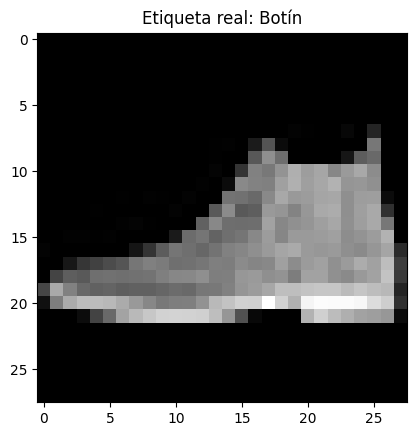

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicción del modelo: Botín


In [14]:
# Clases de Fashion MNIST
class_names = ['Camiseta', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo', 
               'Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Botín']

import numpy as np
import matplotlib.pyplot as plt

# Seleccionar una imagen del test
index = 0
img = X_test[index]
plt.imshow(img, cmap=plt.cm.gray)
plt.title("Etiqueta real: " + class_names[y_test[index]])
plt.show()

# Preparar imagen para el modelo
img_prep = X_test_prep[index].reshape(1, 28*28)

# Predicción
prediction = network.predict(img_prep)
predicted_class = np.argmax(prediction)
print("Predicción del modelo:", class_names[predicted_class])


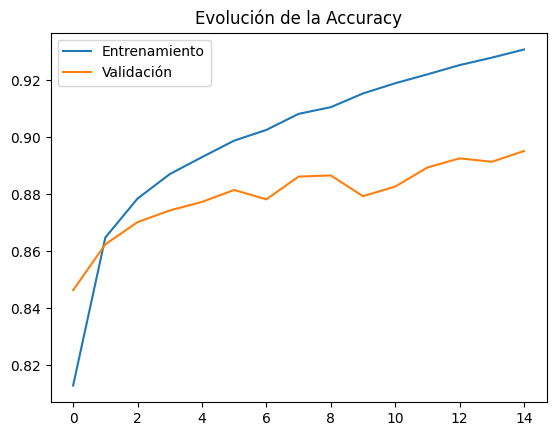

In [15]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.legend()
plt.title("Evolución de la Accuracy")
plt.show()


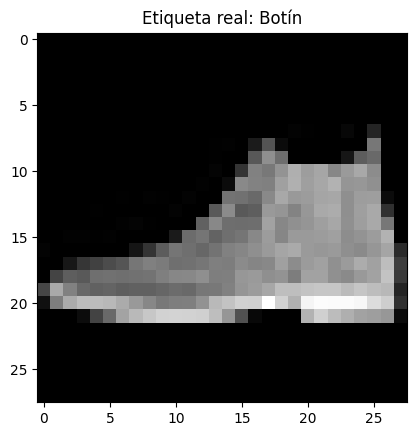

Predicción: Botín
----------------------------------------


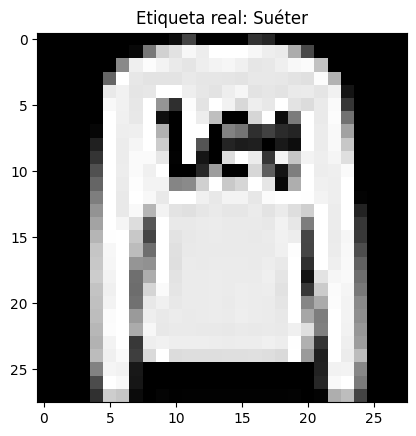

Predicción: Suéter
----------------------------------------


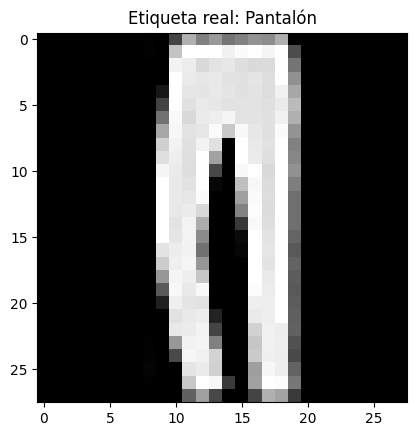

Predicción: Pantalón
----------------------------------------


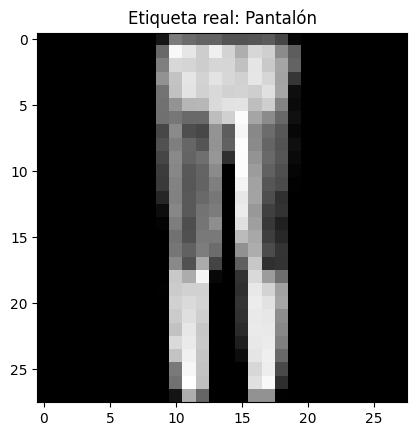

Predicción: Pantalón
----------------------------------------


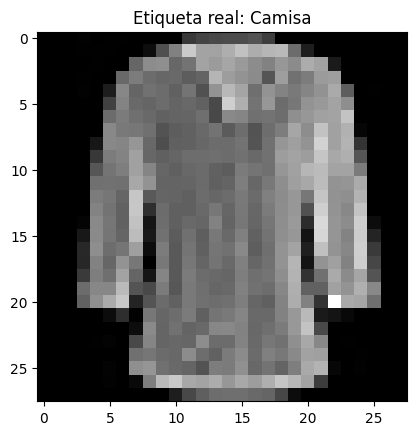

Predicción: Camisa
----------------------------------------


In [16]:
for i in range(5):  # probar 5 imágenes
    img = X_test[i]
    plt.imshow(img, cmap=plt.cm.gray)
    plt.title(f"Etiqueta real: {class_names[y_test[i]]}")
    plt.show()

    img_prep = X_test_prep[i].reshape(1, 28*28)
    prediction = network.predict(img_prep, verbose=0)
    predicted_class = np.argmax(prediction)

    print(f"Predicción: {class_names[predicted_class]}")
    print("-"*40)


In [17]:
probs = prediction[0]
for i, prob in enumerate(probs):
    print(f"{class_names[i]}: {prob:.2f}")


Camiseta: 0.20
Pantalón: 0.00
Suéter: 0.00
Vestido: 0.00
Abrigo: 0.00
Sandalia: 0.00
Camisa: 0.80
Zapatilla: 0.00
Bolso: 0.00
Botín: 0.00


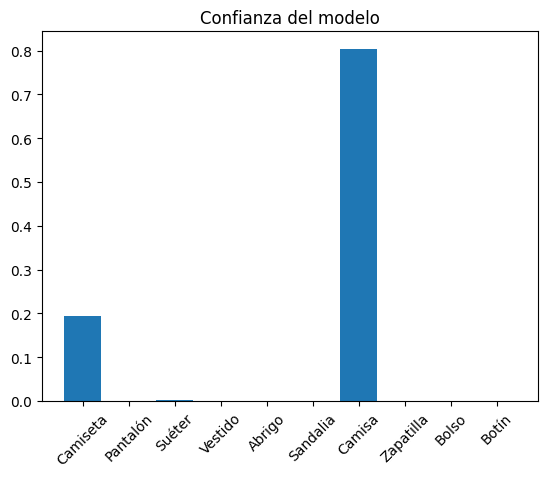

In [18]:
plt.bar(class_names, probs)
plt.xticks(rotation=45)
plt.title("Confianza del modelo")
plt.show()


In [19]:
y_pred = np.argmax(network.predict(X_test_prep, verbose=0), axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred, target_names=class_names))


              precision    recall  f1-score   support

    Camiseta       0.83      0.87      0.85      1000
    Pantalón       0.98      0.98      0.98      1000
      Suéter       0.82      0.82      0.82      1000
     Vestido       0.91      0.87      0.89      1000
      Abrigo       0.79      0.85      0.82      1000
    Sandalia       0.98      0.97      0.98      1000
      Camisa       0.76      0.70      0.73      1000
   Zapatilla       0.93      0.98      0.95      1000
       Bolso       0.99      0.97      0.98      1000
       Botín       0.97      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [20]:
y_pred = np.argmax(network.predict(X_test_prep, verbose=0), axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    Camiseta       0.83      0.87      0.85      1000
    Pantalón       0.98      0.98      0.98      1000
      Suéter       0.82      0.82      0.82      1000
     Vestido       0.91      0.87      0.89      1000
      Abrigo       0.79      0.85      0.82      1000
    Sandalia       0.98      0.97      0.98      1000
      Camisa       0.76      0.70      0.73      1000
   Zapatilla       0.93      0.98      0.95      1000
       Bolso       0.99      0.97      0.98      1000
       Botín       0.97      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [1]:
y_pred = np.argmax(network.predict(X_test_prep, verbose=0), axis=1)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred, target_names=class_names))

NameError: name 'np' is not defined